#### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로  데이터를 분류하는 알고리즘
- 질문하는 방식으로 Yes/No 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향이 없음, 쉬운알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼파라미터 존제!!
- 다른 ML 알고리즘에 비해 성능이 좋지않음==> 단! 여러개의 DT 가 모이면 성능 강해짐
    * 앙상블에 주로 사용됨

[1] 모듈로딩및 준비

In [38]:
# 모듈로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# 데이터 로딩
featureDF, targetSR=load_iris(as_frame=True,return_X_y=True)

[2] 학습용 데이터셋 준비

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(featureDF,targetSR,random_state=10,stratify=targetSR)

[3]  학습 - 기본학습

In [40]:
# 모델 인스턴스 생성
dt_model=DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features_] {dt_model.max_features_}개')
print(f'[dt_model.feature_importantces_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features_] 4개
[dt_model.feature_importantces_] [0.05727497 0.         0.06844775 0.87427728]


- 성능체크

In [42]:
# 학습용 데이터셋에 대한 성능 
train_score=dt_model.score(X_train,y_train)
# 테스트용 데이터셋에 대한 성능 
test_score=dt_model.score(X_test,y_test)

In [43]:
print(f'train_score : test_score = {train_score} : {test_score}')

train_score : test_score = 1.0 : 0.9736842105263158


[4] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [44]:
from sklearn.model_selection import StratifiedKFold,cross_validate

In [45]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5 [defalut]
dt_model2=DecisionTreeClassifier(random_state=1)
result=cross_validate(dt_model2,X_train,y_train,return_train_score=True,return_estimator=True)

In [46]:
# dict => DF
resultDF=pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.002511,0.002000,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.001980,0.002002,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.002518,0.000999,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.001997,0.001002,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.001604,0.000929,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상을 위한 튜닝 ==> 하이퍼파라미터 설정
- 단점 : 과대적합
    * max_depth, min_samples_leaf,... ==> 많음

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# 하이퍼파라미터 dict 생성
params={'max_depth':[4,3,2,1],'min_samples_leaf':[5,3,2]}

In [49]:
gscv=GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,return_train_score=True)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [50]:
# 모델 파라미터 확인
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
#print(f'[gscv.cv_results_]\n {gscv.cv_results_}')
cv_resultDF=pd.DataFrame(gscv.cv_results_)
cv_resultDF.columns

[gscv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gscv.best_score_] 0.9371541501976285
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [51]:
## 가장 좋은 모델
best_model=gscv.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


In [52]:
# 피쳐 중요도 및 겟수
best_model.feature_importances_,best_model.n_features_in_

(array([0.01321873, 0.        , 0.59964451, 0.38713677]), 4)

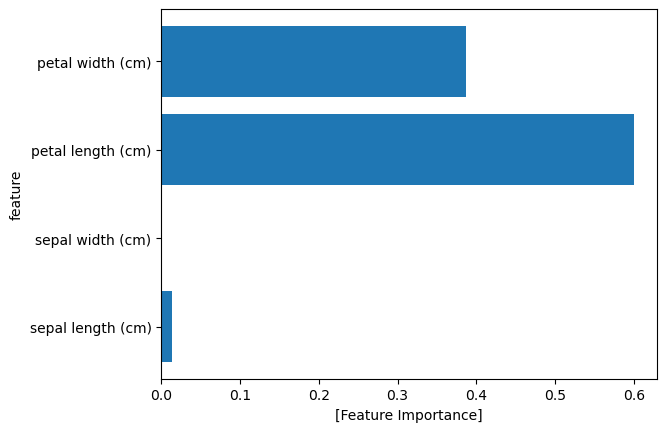

In [53]:
import matplotlib.pyplot as plt
plt.barh(range(best_model.n_features_in_),best_model.feature_importances_,align='center')
plt.yticks(np.arange(best_model.n_features_in_),best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('feature')
plt.show()

- DT 그레프 시각화
    * Graphviz 프로그램 설치 + python 용 패키지 설치

In [58]:
## DT모델을 dot 포멧의 파일로 저장 ==> export_graphviz
from sklearn.tree import export_graphviz
export_graphviz(best_model,out_file='tree.dot',class_names=['setosa','versicolor','verginica'],feature_names=best_model.feature_names_in_,impurity=True,filled=True,rounded=True,rotate=True)

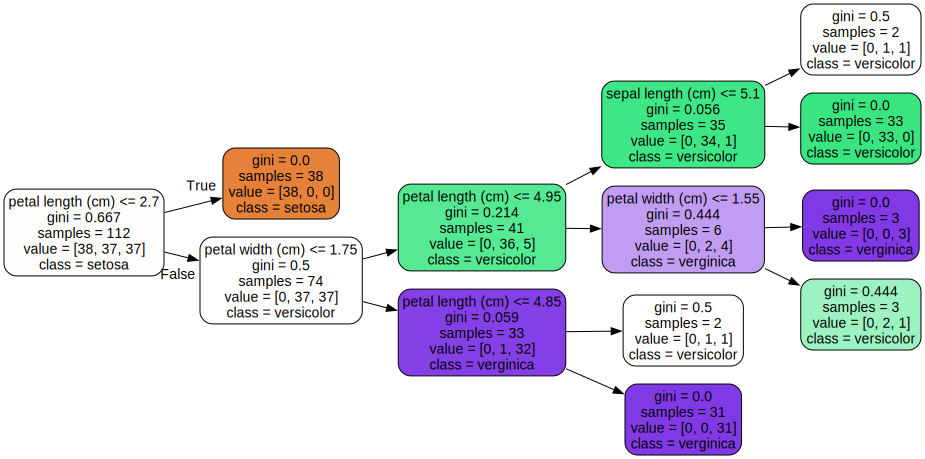

In [59]:
## (2) dot파일 출력
import graphviz
# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()
# 화면에 출력하기
graphviz.Source(dot_data)

[6] 세로운 데이터 예측

In [61]:
new_data=featureDF.iloc[:1]+0.21
new_data.shape

(1, 4)

In [62]:
best_model.predict(new_data)

array([0])

In [63]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])